In [1]:
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.DataPreprocessor import DataPreprocessor
from tools.ModelPipeline import ModelPipeline
from tools.FeatureEngineeringTool import FeatureEngineeringTool

from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import Pipeline

In [2]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["autos"]

In [3]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel_type          193 non-null    object 
 2   aspiration         193 non-null    object 
 3   num_of_doors       193 non-null    int64  
 4   body_style         193 non-null    object 
 5   drive_wheels       193 non-null    object 
 6   engine_location    193 non-null    object 
 7   wheel_base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb_weight        193 non-null    int64  
 12  engine_type        193 non-null    object 
 13  num_of_cylinders   193 non-null    int64  
 14  engine_size        193 non-null    int64  
 15  fuel_system        193 non-null    object 
 16  bore

None

,Column,Has_Nulls,Dtype
make,make,False,object
fuel_type,fuel_type,False,object
aspiration,aspiration,False,object
num_of_doors,num_of_doors,False,int64
body_style,body_style,False,object
drive_wheels,drive_wheels,False,object
engine_location,engine_location,False,object
wheel_base,wheel_base,False,float64
length,length,False,float64
width,width,False,float64



Dataset Shape:

(193, 24)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
num_of_doors,193.0,3.160622,0.989583,2.00,2.00,4.00,4.00,4.00
wheel_base,193.0,98.923834,6.152409,86.60,94.50,97.00,102.40,120.90
length,193.0,174.326425,12.478593,141.10,166.30,173.20,184.60,208.10
width,193.0,65.893782,2.137795,60.30,64.10,65.40,66.90,72.00
height,193.0,53.869948,2.394770,47.80,52.00,54.10,55.70,59.80
curb_weight,193.0,2561.507772,526.700026,1488.00,2145.00,2414.00,2952.00,4066.00
num_of_cylinders,193.0,4.419689,1.023182,3.00,4.00,4.00,4.00,12.00
engine_size,193.0,128.124352,41.590452,61.00,98.00,120.00,146.00,326.00
bore,193.0,3.330622,0.272385,2.54,3.15,3.31,3.59,3.94
stroke,193.0,3.248860,0.315421,2.07,3.11,3.29,3.41,4.17



Missing Values:



make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


Sample Data:



,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [4]:
# Visualize data
# eda.plot_histogram(y="price")
# eda.plot_scatter(y="price")

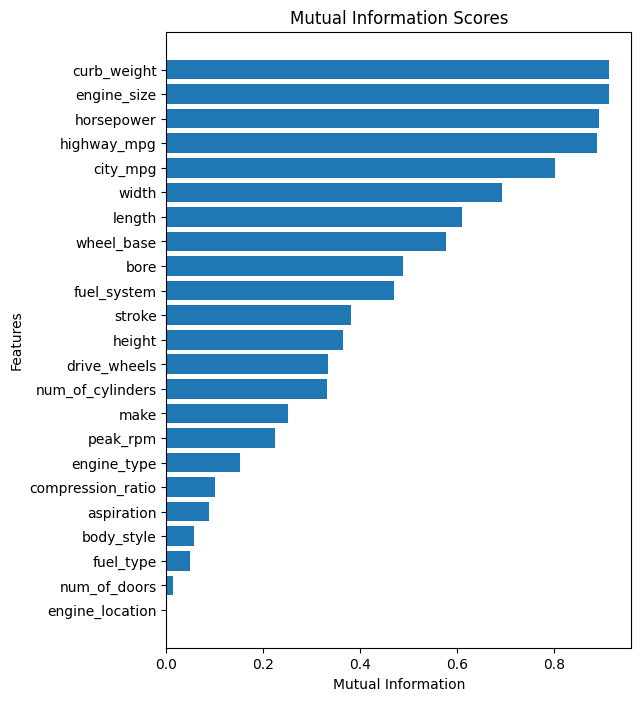

In [5]:
eda.calculate_mutual_information(target="price", discrete_features=["num_of_doors", "num_of_cylinders"], plot=True)

In [6]:
fet = FeatureEngineeringTool(df)

fet.remove_features([])

df = fet.df

No features removed


In [7]:
# Initialize DataPreprocessor
preprocessor = DataPreprocessor(df)

In [8]:
# Split data
X_train, y_train = preprocessor.split_data(target_column="price", split=False)

In [9]:
# Define transformers
numeric_transformers = [
    ("imputer", SimpleImputer(strategy="mean")),
]
categorical_transformers = [
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", TargetEncoder(handle_unknown="ignore")),
]
final_transformers = [
    ("power", PowerTransformer()),
]

In [10]:
# Create pipeline
preprocessor.create_pipeline(
    numeric_transformers, categorical_transformers, final_transformers
)

# Fit and transform train data
X_train_transformed = preprocessor.fit_transform(X_train, y_train)

# # Transform test data
# X_test_transformed = preprocessor.transform(X_test)

In [11]:
# Visualize pipeline
preprocessor.visualize_pipeline()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['num_of_doors', 'wheel_base',
                                                   'length', 'width', 'height',
                                                   'curb_weight',
                                                   'num_of_cylinders',
                                                   'engine_size', 'bore',
                                                   'stroke',
                                                   'compression_ratio',
                                                   'horsepower', 'peak_rpm',
                                                   'city_mpg', 'highway_mpg']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'fuel_type',
                                                   'aspiration', 'body_style',
                                                   'drive_wheels',
                                                   'engine_location',
                                                   'engine_type',
                                                   'fuel_system'])])),
                ('power', PowerTransformer())])

In [12]:
# Define pipelines for different models

pipelines = {
    "RandomForest": Pipeline(
        [
            ("regressor", RandomForestRegressor(random_state=42)),
        ]
    ),
    "GradientBoosting": Pipeline(
        [
            ("regressor", GradientBoostingRegressor(random_state=42)),
        ]
    ),
}

In [13]:
# Define hyperparameters for different models
param_grids = {
    "RandomForest": {
        "regressor__n_estimators": [50, 100],
        "regressor__max_features": ["sqrt", "log2"],
        "regressor__max_depth": [10, 20, None],
    },
    "GradientBoosting": {
        "regressor__n_estimators": [50, 100],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7],
    },
}

In [14]:
# Initialize and train model pipeline
model_pipeline = ModelPipeline()
model_pipeline.train(X_train_transformed, y_train, pipelines, param_grids)

In [15]:
# Visualize pipeline for RandomForest
model_pipeline.visualize_pipeline("RandomForest")

Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       random_state=42))])

In [16]:
# Visualize pipeline for GradientBoosting
model_pipeline.visualize_pipeline("GradientBoosting")

Pipeline(steps=[('regressor',
                 GradientBoostingRegressor(n_estimators=50, random_state=42))])

In [17]:
# Display results on validation set
model_pipeline.display_results(X_train_transformed, y_train)

Results for RandomForest:


,Metric,Parameter,Value
0,Best Parameters,regressor__max_depth,10
1,Best Parameters,regressor__max_features,sqrt
2,Best Parameters,regressor__n_estimators,100


,Metric,Value
0,R²,0.990961
1,MAE,527.191832
2,MAPE,0.040876


Results for GradientBoosting:


,Metric,Parameter,Value
0,Best Parameters,regressor__learning_rate,0.1
1,Best Parameters,regressor__max_depth,3.0
2,Best Parameters,regressor__n_estimators,50.0


,Metric,Value
0,R²,0.988128
1,MAE,678.309568
2,MAPE,0.059235


<Figure size 1200x800 with 0 Axes>

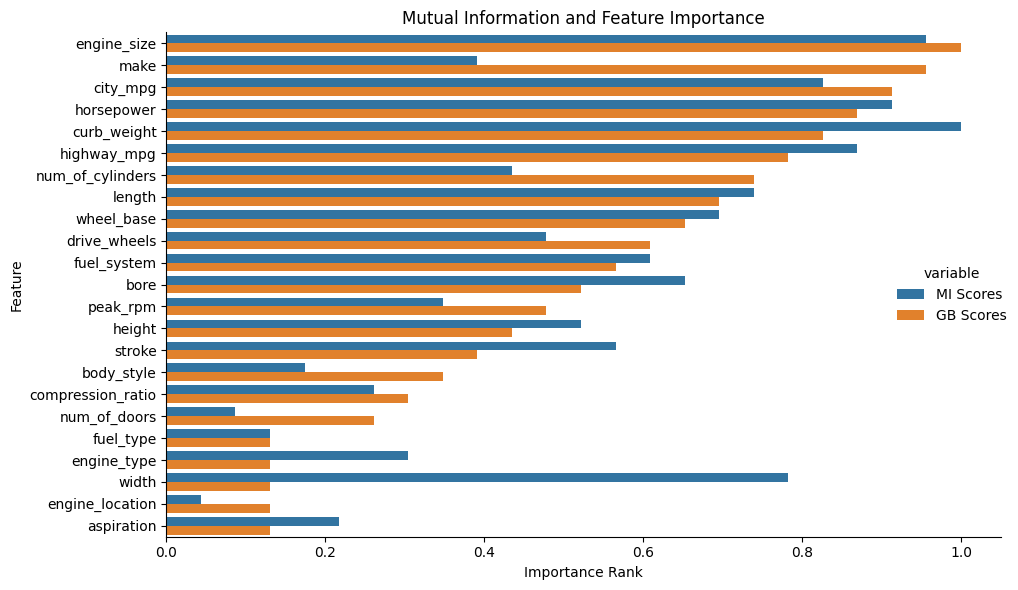

,Feature,MutualInfo,FeatureImportance,MutualInfoRank,FeatureImportanceRank
14,engine_size,0.913529,0.157773,0.956522,1.000000
0,make,0.250691,0.139078,0.391304,0.956522
21,city_mpg,0.802659,0.118986,0.826087,0.913043
19,horsepower,0.893791,0.108793,0.913043,0.869565
11,curb_weight,0.914219,0.098519,1.000000,0.826087
22,highway_mpg,0.889476,0.089145,0.869565,0.782609
13,num_of_cylinders,0.330589,0.071698,0.434783,0.739130
8,length,0.609790,0.055735,0.739130,0.695652
7,wheel_base,0.577447,0.033996,0.695652,0.652174
5,drive_wheels,0.332695,0.028801,0.478261,0.608696


In [18]:
# Plot the mutual information and feature importance.

feature_importance = model_pipeline.feature_importances[model_pipeline.best_model_name]
importance_df = eda.scale_and_plot_importance(
    feature_importance, rank_pct=True, sort_by="FeatureImportanceRank"
)
display(importance_df)

In [19]:
# # Validate on test set
# model_pipeline.validate_on_test(X_test_transformed, y_test)

# Сonclusions

/home/nord/Documents/GitHub/regression_auto/tools/EDA.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/nord/Documents/GitHub/regression_auto/tools/EDA.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/nord/Documents/GitHub/regression_auto/tools/EDA.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/nord/Documents/GitHub/regression_auto/tools/EDA.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fals

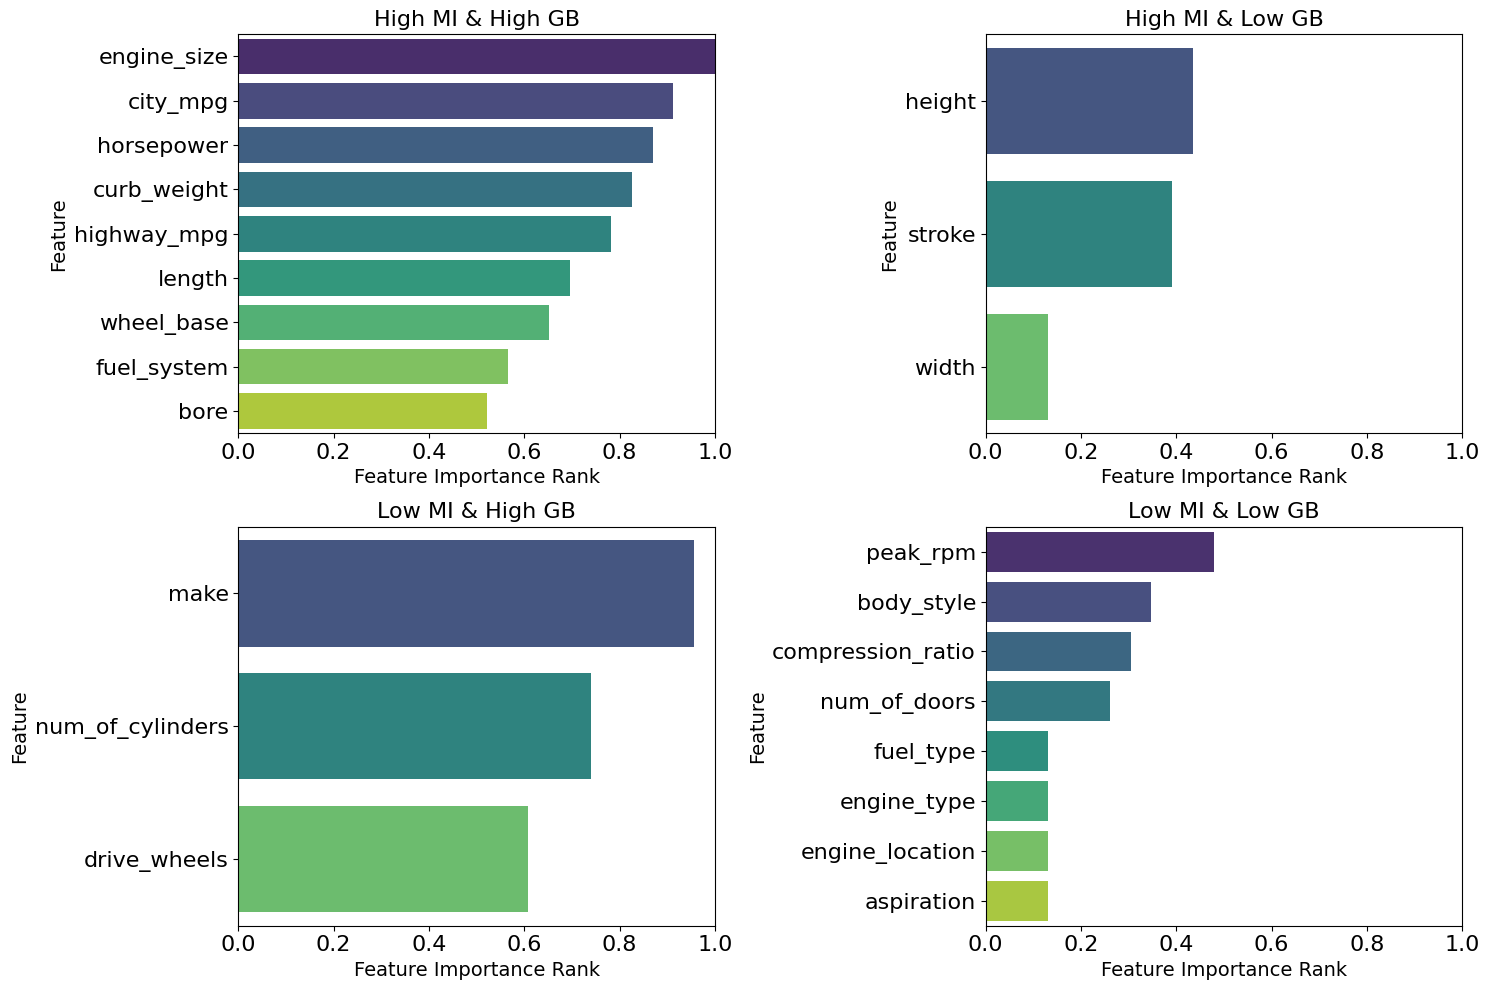

In [20]:
# Plot the MI-GB matrix
eda.plot_mi_gb_matrix(importance_df)

# Analysis and Conclusion:

 High MI and High GB Scores:
engine_size, curb_weight, and horsepower all have high Mutual Information (MI) and high Gradient Boosting (GB) scores, indicating they are strong predictors of the target variable price.

 High MI but Lower GB Scores:
city_mpg, highway_mpg, and make have high MI but lower GB scores, suggesting they are informative about the target but the model relies on them less.

 Low MI and Low GB Scores:
Features like engine_location, fuel_type, and aspiration have low values in both metrics, indicating they are less useful for predicting price.

 No Features with Low MI and High GB Scores:
There are no features with low MI and high GB scores in this dataset, suggesting a good alignment between MI and GB scores.

# Conclusion:
Using both MI and GB scores provides a comprehensive understanding of feature importance and their predictive power in the model. This dual approach helps identify features that are both highly informative and highly utilized by the model, ensuring robust feature selection and model performance.